In [64]:
# 경로 설정 
import os
os.chdir('C:\\Users\\billk\\weathercontest\\data')

In [65]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [66]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [67]:
pd.set_option('display.max_columns',1000)

# 데이터 처리 및 탐색

In [68]:
file = tf.keras.utils
raw_df = pd.read_csv("merge_del_null.csv")

In [69]:
raw_df['1day_yn'] = 0.0
raw_df['2day_yn'] = 0.0

In [70]:
# 열을 밀어서 출력, 맨 첫날, 마지막 날의 경우 산사태가 발생하지 않음.
raw_df['1day_yn'][1:-1] = raw_df['landslide'][0:-2]
raw_df['2day_yn'][2:-1] = raw_df['landslide'][0:-3]

<ipython-input-70-b6da74698f00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['1day_yn'][1:-1] = raw_df['landslide'][0:-2]
<ipython-input-70-b6da74698f00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['2day_yn'][2:-1] = raw_df['landslide'][0:-3]


In [71]:
raw_df.describe()

,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,stnId,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,landslide,1day_yn,2day_yn
count,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.065111e+06,2.065111e+06,2.065111e+06,2.065111e+06,2.065111e+06,2.065111e+06,2.065111e+06,2.103313e+06,2.104684e+06,2.104629e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104406e+06,2.104300e+06,2.103958e+06,2.104165e+06,2.102458e+06,2.104844e+06,2.104844e+06,2.104844e+06,2.104844e+06
mean,1.722850e+00,1.971018e+01,2.563985e+02,2.097763e+01,1.737054e+02,2.772957e+00,9.410095e+00,2.294701e+00,1.437685e+00,1.369127e+01,2.071880e+00,4.987738e+00,2.345603e+02,1.025534e+00,1.881733e+00,1.371268e+00,2.283861e+01,1.758642e+00,4.041828e+00,1.232669e+01,1.354538e+01,8.534530e+00,1.934998e+01,4.199722e-01,1.253725e+00,5.790774e-01,4.251817e+00,7.516591e+00,4.305348e+00,1.726606e+00,4.037708e+01,6.542837e+01,8.387979e-01,6.122544e-03,6.122544e-03,6.122544e-03
std,7.945226e-01,8.151765e+00,1.803885e+02,1.017197e+01,1.063842e+02,1.046690e+00,3.570647e+00,2.006186e+00,7.769746e-01,8.156018e+00,1.293747e+00,6.911993e+00,6.025134e+01,1.577410e-01,3.941429e-01,5.984537e-01,1.718466e+01,5.799690e-01,1.114249e+00,4.353264e+00,9.600463e+00,1.023410e+01,9.615328e+00,1.753797e+00,5.134925e+00,2.556498e+00,1.813040e+01,2.952175e+00,1.728946e+00,9.718058e-01,1.989196e+01,1.700358e+01,9.110533e+00,7.800680e-02,7.800680e-02,7.800680e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.150000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.660000e+01,-2.770000e+01,-1.010000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+00,4.000000e-01,0.000000e+00,1.000000e+00,1.350000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.100000e+01,1.250000e+02,1.500000e+01,8.760000e+01,2.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.620000e+02,1.000000e+00,2.000000e+00,1.000000e+00,1.100000e+01,2.000000e+00,4.000000e+00,1.200000e+01,5.100000e+00,-3.000000e-01,1.110000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.500000e+00,3.100000e+00,1.000000e+00,2.400000e+01,5.310000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2.200000e+01,2.156000e+02,2.150000e+01,1.715000e+02,3.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,1.000000e+01,2.000000e+00,2.000000e+00,2.730000e+02,1.000000e+00,2.000000e+00,1.000000e+00,1.500000e+01,2.000000e+00,4.000000e+00,1.200000e+01,1.450000e+01,8.900000e+00,2.080000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+00,4.100000e+00,1.500000e+00,3.800000e+01,6.710000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.500000e+01,3.571000e+02,2.840000e+01,2.668000e+02,4.000000e+00,1.200000e+01,5.000000e+00,2.000000e+00,2.000000e+01,3.000000e+00,3.000000e+00,2.810000e+02,1.000000e+00,2.000000e+00,2.000000e+00,3.300000e+01,2.000000e+00,5.000000e+00,1.400000e+01,2.170000e+01,1.760000e+01,2.730000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01,9.100000e+00,5.200000e+00,2.200000e+00,5.400000e+01,7.830000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.000000e+00,3.200000e+01,8.838000e+02,5.190000e+01,3.596000e+02,4.000000e+00,1.200000e+01,6.000000e+00,3.000000e+00,3.000000e+01,9.000000e+00,2.700000e+01,2.950000e+02,2.000000e+00,2.000000e+00,4.000000e+00,8.200000e+01,3.000000e+00,9.000000e+00,2.400000e+01,3.410000e+01,2.930000e+01,4.040000e+01,2.900000e+01,1.195000e+02,2.400000e+01,3.329000e+02,3.940000e+01,2.600000e+0

# 클래스 레이블 불균형 조사

In [73]:
neg, pos = np.bincount(raw_df['2day_yn'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 2104844
    Positive: 12887 (0.61% of total)



### 전체 데이터중 산사태 비중이 0.35%로 불균형이 심함을 알 수 있다.

# 데이터 정리, 분할 및 정규화

In [74]:
#분석을 위해 음수 값을 가지는 칼럼들을 제외하고 결측치를 0으로 대체한다.
select_df = raw_df[['PRRCK_LARG','PRRCK_MDDL','LOCTN_ALTT','LOCTN_GRDN','CLZN_CD','TPGRP_TPCD','PRDN_FOM_C','SLANT_TYP','SLANT_TYP','SLDPT_TPCD','SCSTX_CD','SLTP_CD','stnId','avgTa', 'minTa','STORUNST','FROR_CD','FRTP_CD','KOFTR_GROU','DMCLS_CD','AGCLS_CD','HEIGHT','mi10MaxRn','hr1MaxRn', 'sumRnDur', 'sumRn', 
       'maxInsWs', 'maxWs', 'avgWs', 'minRhm','avgRhm', 'n99Rn','2day_yn']]
cleaned_df = select_df.fillna(0)
cleaned_df.info()
cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104844 entries, 0 to 2104843
Data columns (total 33 columns):
 #   Column      Dtype  
---  ------      -----  
 0   PRRCK_LARG  float64
 1   PRRCK_MDDL  float64
 2   LOCTN_ALTT  float64
 3   LOCTN_GRDN  float64
 4   CLZN_CD     float64
 5   TPGRP_TPCD  float64
 6   PRDN_FOM_C  float64
 7   SLANT_TYP   float64
 8   SLANT_TYP   float64
 9   SLDPT_TPCD  float64
 10  SCSTX_CD    float64
 11  SLTP_CD     float64
 12  stnId       int64  
 13  avgTa       float64
 14  minTa       float64
 15  STORUNST    float64
 16  FROR_CD     float64
 17  FRTP_CD     float64
 18  KOFTR_GROU  float64
 19  DMCLS_CD    float64
 20  AGCLS_CD    float64
 21  HEIGHT      float64
 22  mi10MaxRn   float64
 23  hr1MaxRn    float64
 24  sumRnDur    float64
 25  sumRn       float64
 26  maxInsWs    float64
 27  maxWs       float64
 28  avgWs       float64
 29  minRhm      float64
 30  avgRhm      float64
 31  n99Rn       float64
 32  2day_yn     float64
dtypes: floa

,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,stnId,avgTa,minTa,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,2day_yn
0,2.0,24.0,306.1,18.7,3.0,12.0,1.0,1.0,1.0,20.0,2.0,1.0,285,-2.1,-8.4,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.3,6.0,1.8,25.0,48.9,0.0,0.0
1,2.0,24.0,306.1,18.7,3.0,12.0,1.0,1.0,1.0,20.0,2.0,1.0,285,-2.3,-8.8,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.4,4.9,1.0,31.0,67.0,0.0,0.0
2,2.0,24.0,306.1,18.7,3.0,12.0,1.0,1.0,1.0,20.0,2.0,1.0,285,-2.8,-10.1,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0,0.4,5.7,3.7,0.8,36.0,77.8,0.0,0.0
3,2.0,24.0,306.1,18.7,3.0,12.0,1.0,1.0,1.0,20.0,2.0,1.0,285,-1.6,-6.3,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,5.8,2.8,1.0,35.0,73.9,0.0,0.0
4,2.0,24.0,306.1,18.7,3.0,12.0,1.0,1.0,1.0,20.0,2.0,1.0,285,-0.8,-6.9,1.0,1.0,3.0,77.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.3,4.5,1.4,33.0,60.3,0.0,0.0


In [75]:
# 데이터 스플릿, 셔플링
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

#label(변수들), feature(2day_yn)를 np array 형태로 변환
train_labels = np.array(train_df.pop('2day_yn'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('2day_yn'))
test_labels = np.array(test_df.pop('2day_yn'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [76]:
# sklearn StandardScaler를 사용하여 입력 기능을 정규화
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (1347100,)
Validation labels shape: (336775,)
Test labels shape: (420969,)
Training features shape: (1347100, 32)
Validation features shape: (336775, 32)
Test features shape: (420969, 32)


# 데이터 분포 살펴보기 - 정규화 후 살펴봄
# 평균 : 0, 표준편차 : 1
# 살펴볼 변수로는 avgWs, avgRhm 두 변수를 살펴봄

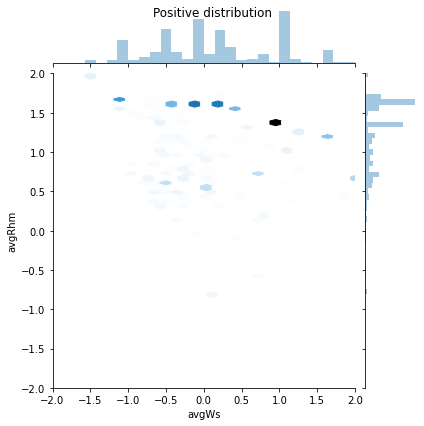

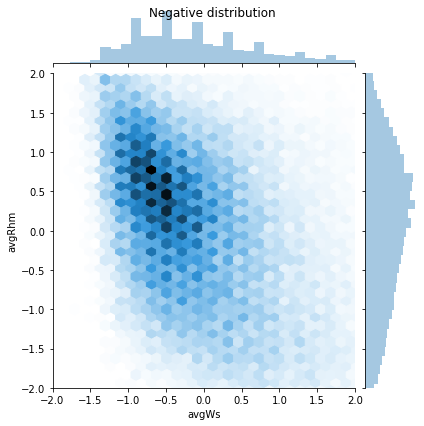

In [77]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['avgWs'], pos_df['avgRhm'],
              kind='hex', xlim=(-2,2), ylim=(-2,2))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['avgWs'], neg_df['avgRhm'],
              kind='hex', xlim=(-2,2), ylim=(-2,2))
_ = plt.suptitle("Negative distribution")

### 유용한 메트릭 이해

위에서 정의한 몇 가지 지표는 성능을 평가할 때 도움이 될 모델에 의해 계산될 수 있다는 점에 유의하십시오. 



*   **거짓** 음성 그리고 **거짓** 양성은 **잘못** 분류된 샘플입니다.
*   **참** 음성 그리고 **참** 양성은 **제대로** 분류된 샘플입니다.
*   **정확도** 는 올바르게 분류된 예제의 비율입니다.
>   $\frac{\text{true samples}}{\text{total samples}}$
*   **정밀도** 는 올바르게 분류된 **예측** 긍정 비율입니다.
>   $\frac{\text{true positives}}{\text{true positives + false positives}}$
*   **재현 율** 은 올바르게 분류된 **실제** 긍정 비율입니다.
>   $\frac{\text{true positives}}{\text{true positives + false negatives}}$
*   **AUC** 는 수신자 조작 특성 곡선 아래 영역(ROC-AUC)을 나타냅니다. 이 메트릭은 분류기가 무작위 음성 샘플보다 무작위 양성 샘플의 순위를 매길 확률과 동일합니다. 

## 참고: 정확도는 이 작업에 유용한 측정 항목이 아닙니다. 항상 False를 예측해야 이 작업에서 99.8% 이상의 정확도를 얻을 수 있습니다.

Read more:
*  [참 vs. 거짓 and 긍정 vs. 부정](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative)
*  [정확성](https://developers.google.com/machine-learning/crash-course/classification/accuracy)
*   [정밀도와 재현율](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
*   [ROC-AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

# 모델 및 메트릭 정의
히든레이어, 과적합 방지를 위한 drop out 레이어, 2진 분할을 가능성을 출력하는 sigmoid 레이어로 간단한 신경망을 생성하는 함수를 정의한다.

In [78]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

# 기준 모델 - 모델 구축 - 아직 불균형 해결 x

In [79]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [80]:
model = make_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.predict(train_features[:10])

array([[0.1592817 ],
       [0.19661412],
       [0.8599291 ],
       [0.20693919],
       [0.26009485],
       [0.3750832 ],
       [0.88878834],
       [0.32440048],
       [0.35463881],
       [0.23390383]], dtype=float32)

# 선택사항 : 올바른 초기 바이어스 설정
우리는 데이터 세트가 불균형 하다는 것을 알고 있다. 따라서 이를 반영하도록 출력 계층의 바이어스를 설정이는 초기 수렴에 도움을 준다.

기본 바이어스 초기화를 사용하면 손실은 약 `math.log(2) = 0.69314` 

In [82]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6502


설정할 올바른 바이어스는 다음에서 파생 가능합니다.:

$$ p_0 = pos/(pos + neg) = 1/(1+e^{-b_0}) $$
$$ b_0 = -log_e(1/p_0 - 1) $$
$$ b_0 = log_e(pos/neg)$$

In [83]:
#pos, neg는 위에서 이미 정의함
initial_bias = np.log([pos/neg])
initial_bias

array([-5.08963622])

In [84]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.00660783],
       [0.00346875],
       [0.00477016],
       [0.00625464],
       [0.02478099],
       [0.00557381],
       [0.01837218],
       [0.02994236],
       [0.00467449],
       [0.00413251]], dtype=float32)

In [85]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0474


#위와 같이 초기화를 통해서 초기 손실을 극단적으로 낮출 수 있다. 이는 초기 예측 가능서이 낮다는 것을 알게 해주고 추후 epoch을 보낼 필요가 없다는 것을 알게 됩니다. 또한 훈련 과정 중 손실을 더 쉽게 나타내 줍니다.

# 초기 가중치 체크 포인트

In [86]:
#가중치 비교를 위한 저장
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

## 바이어스 최기화 비교

In [87]:
#바이어스 초기화 x 모델
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [88]:
#바이어스 초기화 O 모델
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [89]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch, history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

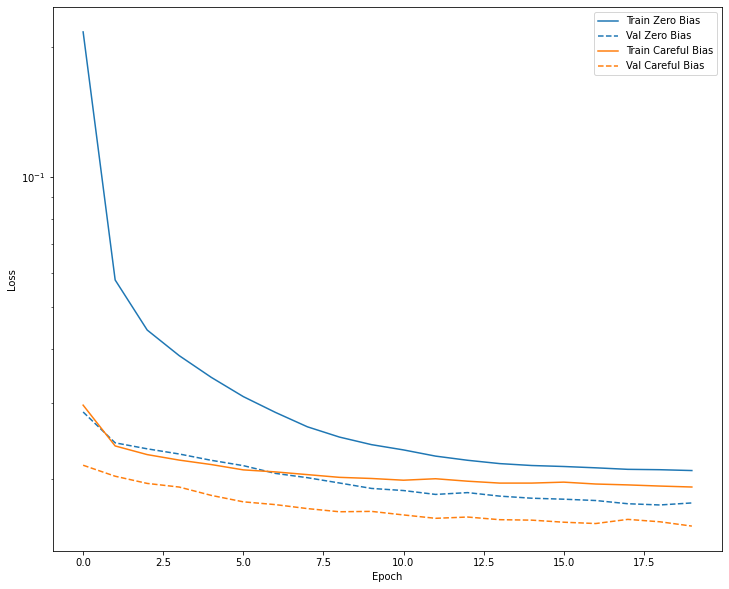

In [91]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

위의 그림을 통해 바이어스 초기화가 효과적이라는 것을 알았고, 이는 바이어스 최기화의 장점을 잘 보여준다.

# 모델 훈련

In [92]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
658/658 [==============================] - 16s 17ms/step - loss: 0.0351 - tp: 987.6859 - fp: 905.6874 - tn: 1005681.0395 - fn: 5036.0106 - accuracy: 0.9942 - precision: 0.5350 - recall: 0.1803 - auc: 0.8543 - val_loss: 0.0213 - val_tp: 2.0000 - val_fp: 3.0000 - val_tn: 334766.0000 - val_fn: 2004.0000 - val_accuracy: 0.9940 - val_precision: 0.4000 - val_recall: 9.9701e-04 - val_auc: 0.8808
Epoch 2/100
658/658 [==============================] - 9s 14ms/step - loss: 0.0238 - tp: 526.9757 - fp: 509.2079 - tn: 671263.4537 - fn: 3535.7860 - accuracy: 0.9941 - precision: 0.5039 - recall: 0.1289 - auc: 0.8844 - val_loss: 0.0205 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 334769.0000 - val_fn: 2006.0000 - val_accuracy: 0.9940 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8985
Epoch 3/100
658/658 [==============================] - 10s 14ms/step - loss: 0.0229 - tp: 622.3065 - fp: 537.3900 - tn: 671181.0698 - fn: 3494.6571 - accuracy: 0.9940 - precision: 0.

## 학습 이력 확인

In [102]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


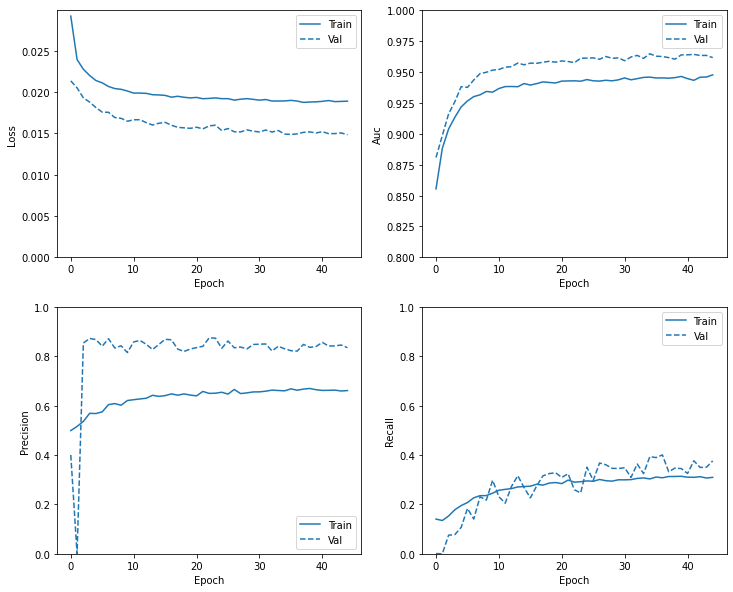

In [103]:
plot_metrics(baseline_history)

위 그래프를 보니 precision, recall 0이 나왔는데 이는 true positive, 즉 진짜 산사태가 일어난 1인 곳을 잘 예측한게 하나도 없다. 즉 제대로 예측이 이루어지지 않았음을 알 수 있다.

## 매트릭 평가

In [104]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [105]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.015516042709350586
tp :  1113.0
fp :  217.0
tn :  418065.0
fn :  1574.0
accuracy :  0.9957455396652222
precision :  0.8368421196937561
recall :  0.4142166078090668
auc :  0.9635883569717407

Legitimate Transactions Detected (True Negatives):  418065
Legitimate Transactions Incorrectly Detected (False Positives):  217
Fraudulent Transactions Missed (False Negatives):  1574
Fraudulent Transactions Detected (True Positives):  1113
Total Fraudulent Transactions:  2687


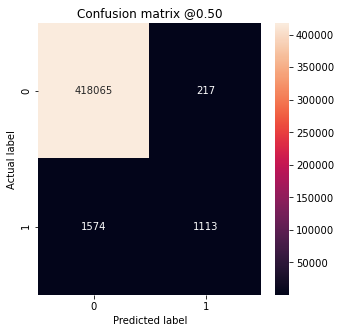

In [106]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

위의 그림으로 볼 때 실제 예측이 잘 이루어지지 않았음을 알 수 있다.

## ROC 그래프

In [107]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

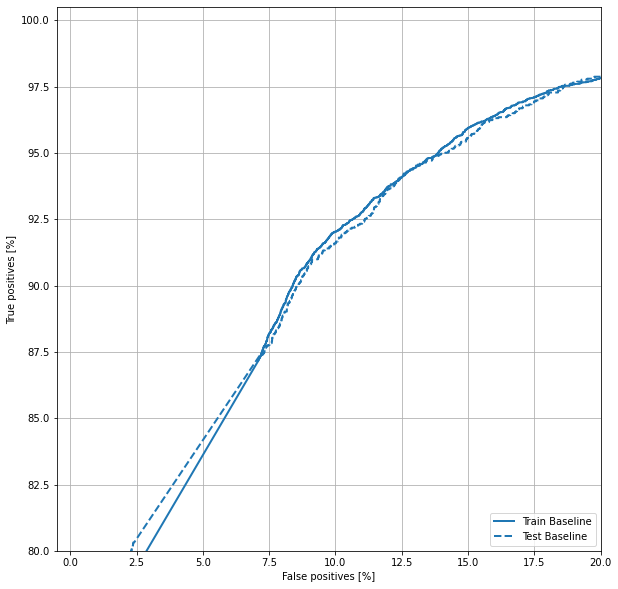

In [108]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

밑 면적이 제법 높게 나오지만 이는 0을 0으로 분류한 결과 때문이지 잘 예측했다고는 볼 수 없다.

# 클래스 가중치

## 클래스 가중치 계산

In [109]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
#neg : 산사태가 발생하지 않을 확률(0)
#pos : 산사태가 발생할 확률(1)
weight_for_0 = (1 / neg)*(total)/1.0 
weight_for_1 = (1 / pos)*(total)/1.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.01
Weight for class 1: 163.33


## 클래스 가중치로 모델 교육

참고: `class_weights` 를 사용하면 손실 범위가 바뀝니다. 이는 최적기에 따라 학습의 안정성에 영향을 미칠 수 있습니다. 단계 크기가 그라데이션의 크기에 따라 달라지는 `optimizers.SGD` 와 같은 최적화 도구는 실패할 수 있습니다. 여기서 사용되는 최적화기인 `optimizers.Adam` 은 스케일링 변화에 영향을 받지 않습니다. 또한 가중치 때문에 전체 손실은 두 모델 간에 비교할 수 없습니다. 

In [110]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
658/658 [==============================] - 11s 12ms/step - loss: 2.4235 - tp: 3237.5129 - fp: 45853.6328 - tn: 1044145.6388 - fn: 3567.6388 - accuracy: 0.9622 - precision: 0.1393 - recall: 0.4488 - auc: 0.8552 - val_loss: 0.2740 - val_tp: 1564.0000 - val_fp: 21772.0000 - val_tn: 312997.0000 - val_fn: 442.0000 - val_accuracy: 0.9340 - val_precision: 0.0670 - val_recall: 0.7797 - val_auc: 0.9342
Epoch 2/100
658/658 [==============================] - 7s 10ms/step - loss: 0.9680 - tp: 3096.3612 - fp: 69738.4734 - tn: 601993.2155 - fn: 1007.3733 - accuracy: 0.8947 - precision: 0.0429 - recall: 0.7524 - auc: 0.9066 - val_loss: 0.2729 - val_tp: 1572.0000 - val_fp: 23935.0000 - val_tn: 310834.0000 - val_fn: 434.0000 - val_accuracy: 0.9276 - val_precision: 0.0616 - val_recall: 0.7836 - val_auc: 0.9394
Epoch 3/100
658/658 [==============================] - 7s 10ms/step - loss: 0.8565 - tp: 3135.0455 - fp: 69043.9772 - tn: 602677.7496 - fn: 978.6510 - accuracy: 0.8960 - precision: 0.0

### 학습 이력 조회

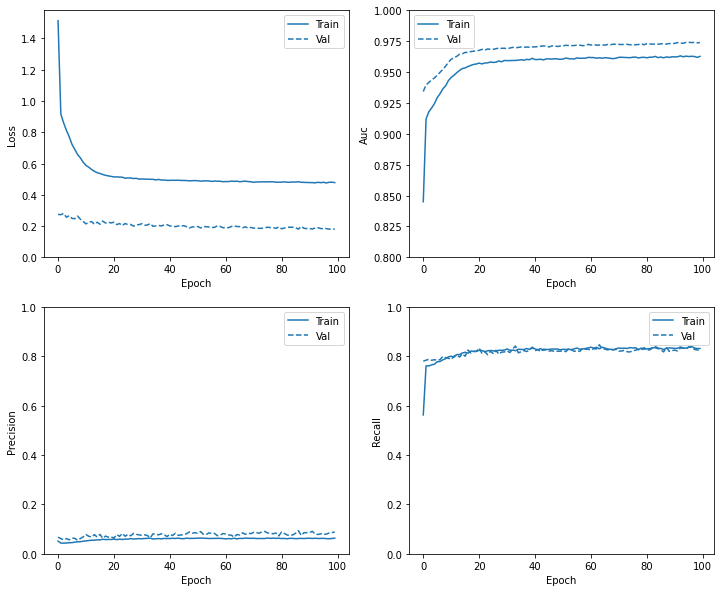

In [111]:
plot_metrics(weighted_history)

In [54]:
2#가중치 2.0 기준으로 학습시
loss :  0.1835394948720932
tp :  53.0
fp :  844.0
tn :  19536.0
fn :  5.0
accuracy :  0.958459734916687
precision :  0.05908584222197533
recall :  0.9137930870056152
auc :  0.9873133897781372
#가중치 1.0으로 학습시 - 종전보다 오히려 소폭 하락한 AUC 결과값이 나온다.
loss :  0.18933920562267303
tp :  53.0
fp :  878.0
tn :  19502.0
fn :  5.0
accuracy :  0.9567961692810059
precision :  0.056928034871816635
recall :  0.9137930870056152
auc :  0.9869509339332581

In [ ]:
그래도 의미가 있는 그래프가 도출되었다. recall 값이 90프로 이상이 나왔다.

### 매트릭 평가

In [112]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.17992213368415833
tp :  2226.0
fp :  21238.0
tn :  397044.0
fn :  461.0
accuracy :  0.9484546184539795
precision :  0.0948687344789505
recall :  0.8284332156181335
auc :  0.9738011360168457

Legitimate Transactions Detected (True Negatives):  397044
Legitimate Transactions Incorrectly Detected (False Positives):  21238
Fraudulent Transactions Missed (False Negatives):  461
Fraudulent Transactions Detected (True Positives):  2226
Total Fraudulent Transactions:  2687


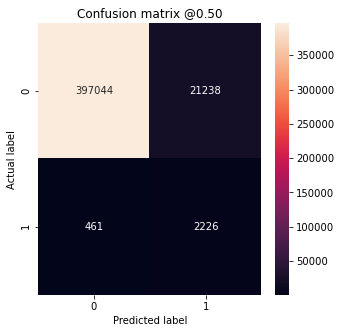

In [113]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

비록 정확도가 낮음에도 이 모델의 결과는 리콜이 더 높게 나왔다. 즉 더 잘 산사태를 식별했음을 의미한다. 가중치를 줌으로써 산사태 식별 리콜 값이 올라갔다. 하지만 너무 과한 가중치는 정확도를 낮추기 때문에 주의할 필요가 있다.

### ROC 그래프

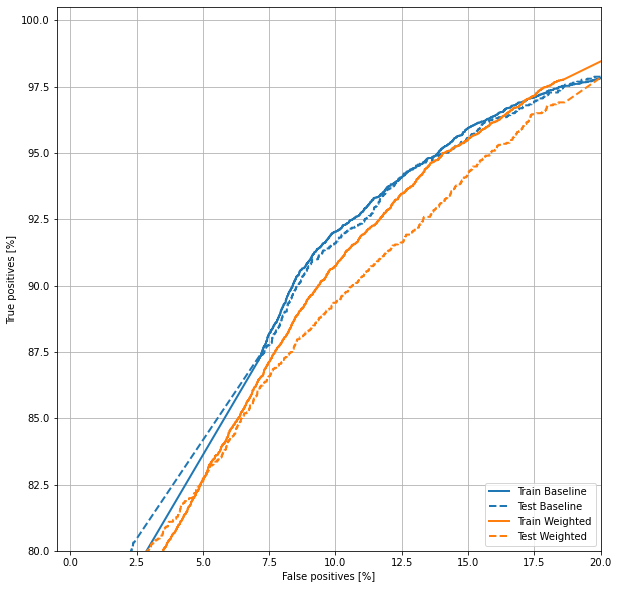

In [114]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

# 오버샘플링

### 소수 계급 과대 표본

In [115]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

### NumPy 사용 

In [116]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(1338906, 32)

In [117]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(2677812, 32)

#### `tf.data` 사용

`tf.data` 사용하는 경우 균형 잡힌 예제를 생성하는 가장 쉬운 방법은 `positive` 그리고 `negative` 데이터 세트로 시작하여 병합하는 것입니다. 더 많은 예는 [tf.data guide](../../guide/data.ipynb) 를 참조하세요.

In [118]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

각 데이터 세트는 `(feature, label)` 쌍을 제공합니다.:

In [119]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-0.90914495 -0.94514073 -0.42990134  0.21905401  0.21712006 -0.67422528
  1.84779935  2.01179072  2.01179072  0.77315543  0.71773284 -0.43141555
  0.8042503   0.23717489  0.31082987 -0.02955651  0.32945614 -0.55579563
 -0.65929777  0.44109941  0.02827497  0.41212906 -0.23904081 -0.24406633
 -0.22681547 -0.23450246 -0.47953674 -0.46558404 -0.12983802 -0.06767161
 -0.03165683 -0.09239732]

Label:  1.0


In [120]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [121]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.48876953125


이 데이터 세트를 사용하려면 epoch 당 단계 수가 필요합니다.

이 경우 "epoch" 의 정의는 명확하지 않습니다. 각 부정적인 예를 한번 볼 때 필요한 배치 수라고 가정합니다.:

In [122]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

2043.0

# 오버 샘플링 된 데이터에 대한 학습

이제 클래스 가중치를 사용하는 대신 리 샘플링 된 데이터 세트로 모델을 학습하여 이러한 방법이 어떻게 비교되는지 확인하십시오.

참고: 긍정적인 예를 복제하여 데이터가 균형을 이루었기 때문에 총 데이터 세트 크기가 더 크고 각 세대가 더 많은 학습 단계를 위해 실행됩니다. 

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
2043/2043 [==============================] - 63s 27ms/step - loss: 0.4236 - tp: 812704.2720 - fp: 151053.4139 - tn: 1315013.1414 - fn: 236277.1707 - accuracy: 0.8440 - precision: 0.7904 - recall: 0.7622 - auc: 0.9174 - val_loss: 0.2363 - val_tp: 1589.0000 - val_fp: 16965.0000 - val_tn: 317804.0000 - val_fn: 417.0000 - val_accuracy: 0.9484 - val_precision: 0.0856 - val_recall: 0.7921 - val_auc: 0.9626
Epoch 2/100
 886/2043 [============>.................] - ETA: 31s - loss: 0.2599 - tp: 362445.0813 - fp: 28119.8205 - tn: 426304.4515 - fn: 91418.6467 - accuracy: 0.8681 - precision: 0.9286 - recall: 0.7975 - auc: 0.9551

만약 훈련 프로세스가 각 기울기 업데이트에서 전체 데이터 세트를 고려하는 경우, 이 오버 샘플링은 기본적으로 클래스 가중치와 동일합니다. 

그러나 여기에서 한 것처럼 모델을 배치 방식으로 훈련 할 때 오버 샘플링 된 데이터는 더 부드러운 기울기 신호를 제공합니다. 각각의 긍정적인 예가 큰 가중치를 가진 하나의 배치로 표시되는 대신, 그것들은 작은 가중치로 매 회 많은 다른 배치로 보여집니다. 

이 부드러운 기울기 신호는 모델을 더 쉽게 훈련 할 수 있습니다.

In [ ]:
plot_metrics(resampled_history)

precision은 비록 떨어져도 recall 값이 매우 높은 갚으로 나왔다.

### 재교육

균형 잡힌 데이터에 대한 훈련이 더 쉽기 때문에 위의 훈련 절차가 빠르게 과적합 될 수 있습니다. 

따라서 epochs를 분리하여 `callbacks.EarlyStopping`을 제공하십시오. 

In [57]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 7s 117ms/step - loss: 1.4285 - tp: 6292.2857 - fp: 19030.3810 - tn: 326725.2857 - fn: 7157.5238 - accuracy: 0.9276 - precision: 0.2379 - recall: 0.4937 - auc: 0.9006 - val_loss: 0.7500 - val_tp: 1132.0000 - val_fp: 160079.0000 - val_tn: 174541.0000 - val_fn: 1023.0000 - val_accuracy: 0.5216 - val_precision: 0.0070 - val_recall: 0.5253 - val_auc: 0.5223
Epoch 2/1000
20/20 [==============================] - 1s 70ms/step - loss: 0.9775 - tp: 6162.0000 - fp: 5644.7143 - tn: 5627.4762 - fn: 4996.2857 - accuracy: 0.5163 - precision: 0.5129 - recall: 0.5378 - auc: 0.5396 - val_loss: 0.6754 - val_tp: 1787.0000 - val_fp: 140678.0000 - val_tn: 193942.0000 - val_fn: 368.0000 - val_accuracy: 0.5812 - val_precision: 0.0125 - val_recall: 0.8292 - val_auc: 0.8290
Epoch 3/1000
20/20 [==============================] - 1s 70ms/step - loss: 0.7209 - tp: 7557.6190 - fp: 5042.8095 - tn: 6187.2381 - fn: 3642.8095 - accuracy: 0.6058 - precision: 0.5926 - 

### 훈련 이력 재확인

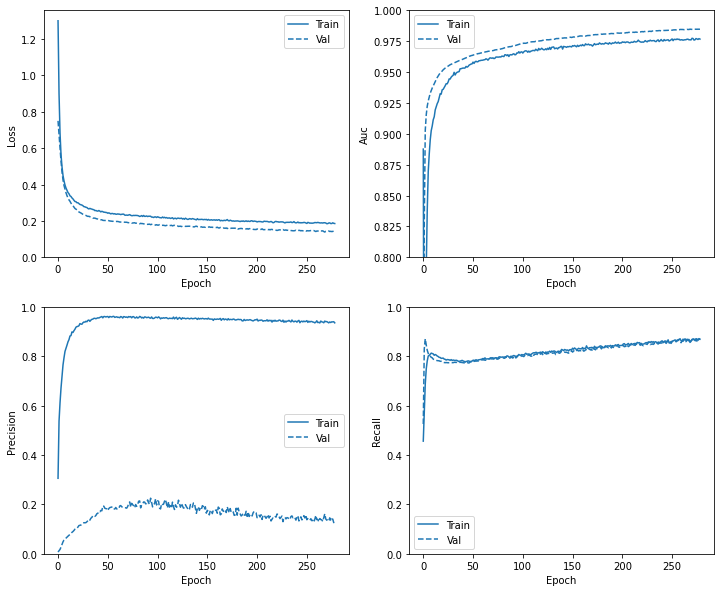

In [58]:
plot_metrics(resampled_history)

재훈련 결과 : precision: 0.9548 - recall: 0.9655 - auc: 0.9874 즉 매우 우수한 성능으로 나타났다.

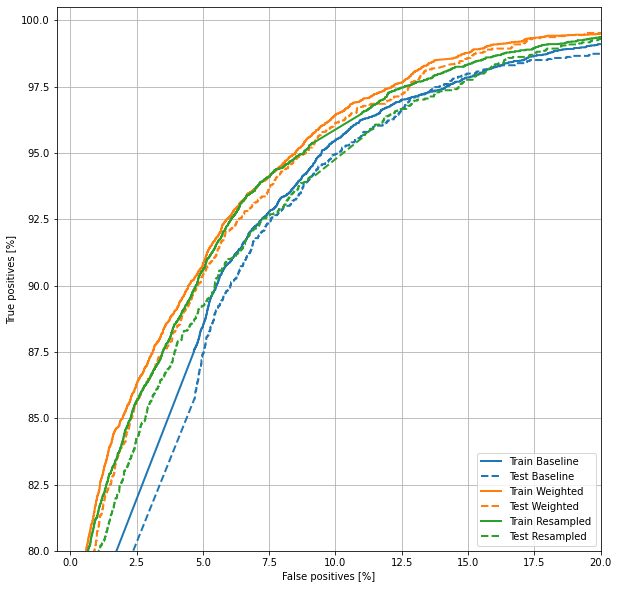

In [63]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

## 매트릭 평가

In [60]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.139125794172287
tp :  2166.0
fp :  11919.0
tn :  406504.0
fn :  380.0
accuracy :  0.970784068107605
precision :  0.15378062427043915
recall :  0.8507462739944458
auc :  0.984800398349762

Legitimate Transactions Detected (True Negatives):  406504
Legitimate Transactions Incorrectly Detected (False Positives):  11919
Fraudulent Transactions Missed (False Negatives):  380
Fraudulent Transactions Detected (True Positives):  2166
Total Fraudulent Transactions:  2546


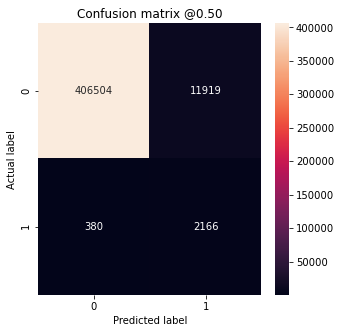

In [61]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

기존의 분포에 비교해 보면 정말 크게 그 분포가 달라졌음을 확인 할 수 있다.

### ROC 그래프 비교 
Train Baseline  vs Train Weighted vs Train Resampled

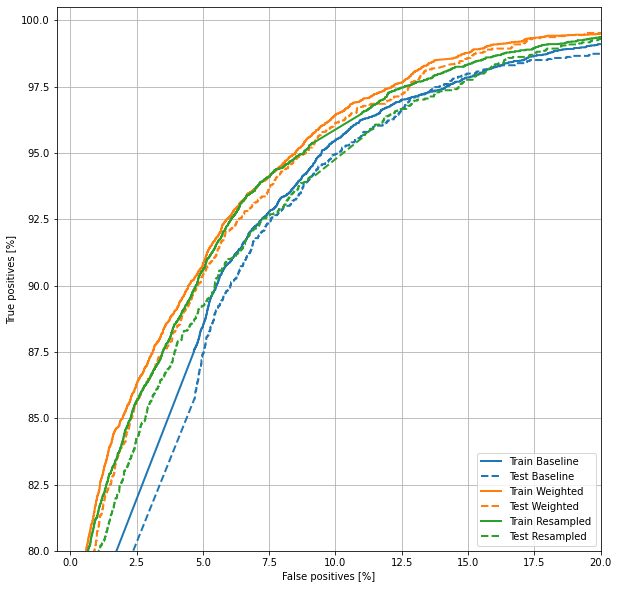

In [62]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')